# Big jump principle for heavy-tailed random walk with correlated increments
This file presents an overview of our work in the preprint https://arxiv.org/abs/2106.14222.

The big jump principle explains the emergence of extreme events for physical quantities modelled by a sum of independent and identically distributed random variables which are heavy-tailed. Extreme events are large values of the sum and they are solely dominated by the largest summand called the big jump. Recently, the principle was introduced into physical sciences where systems usually exhibit correlations. Here, we study the principle for a random walk with correlated increments. Examples are the autoregressive model of first order and the discretized Ornstein-Uhlenbeck process both with heavy-tailed noise.

# The model

We consider a random walk $\widetilde{x}_N$ which is the sum
$$\widetilde{x}_N=\sum_{i=1}^N \widetilde{\delta}_i.$$
The $N$ increments $\widetilde{\delta}_i$ are correlated among each other. We construct them via the weighted sum
$$\widetilde{\delta}_i=\sum_{j=1}^iM_{i-j}\delta_j.$$
Here, we have the memory kernel $M_{i-j}$ and independent and identically distributed (iid) random variables $\delta_i$, $i=1,\ldots,N$.

The probability density function of the iid random variables follow for large values a power law
$$p(\delta_i)\sim A {\delta_i}^{-1-\alpha}$$
with some prefactor $A$ and the exponent $\alpha\in(0,1)$ or $\alpha\in(1,2)$.

The memory kernel can be exponential
$$M_{i-j}=m^{i-j}, 0<m<1,$$
or
algebraical
$$M_{i-j}=(i-j+1)^{-\beta}, 0<\beta<1.$$
A special case is $M_0=1$ and $M_{i-j}=1$ otherwise: Then the model reduces to the random walk with iid increments.

# Two the big jump principles
Generally, a big jump principle relates the distributions of the sum $\widetilde{x}_N$ and the maximum $\widetilde{\delta}_\mathrm{max}=\mathrm{max}(\widetilde{\delta}_1,\ldots,\widetilde{\delta}_N)$ when both are large.

We have two big jump principles: 1) Unconditional and 2) Conditional on the step number of the maximum.

# Unconditional big jump principle
For large $z$ and any $N$, the unconditional (it doesn't matter where the maximum happens) big jump principle is
$$\mathrm{Prob}(\widetilde{x}_N>z) \sim \frac{\widetilde{\gamma}_N}{N}\mathrm{Prob}(\widetilde{\delta}_\mathrm{max}>z) $$
with
$$\widetilde{\gamma}_N=\sum_{k=1}^N\left(\sum_{l=0}^{N-k}M_l\right)^\alpha.$$

# Conditional big jump principle
Let the maximum happen at $i=b$. For large $z$ and any $N$, the conditional big jump principle is
$$\mathrm{Prob}(\widetilde{x}_N>z|b) \sim \left(\sum_{l=0}^{N-b} M_l\right)^\alpha\mathrm{Prob}(\widetilde{\delta}_\mathrm{max}>z|b).$$

# Python code for the scatter plot

# Python code for a scatter plot analysis
The following code simulations $r$ realizations of $\widetilde{x}_N$. For each realizations, we plot $(\widetilde{\delta}_\mathrm{max},\widetilde{x}_N)$ into a scatter plot. According to our theory, we observe $N$ lines in the scatter plot. In below example, we have $N=2$.

In [51]:
n=2
alpha=1.5
m=0.9
beta=0.5
r=100000 # number of realizations

size_of_font=24
size_of_ticks=17
size_of_marker=8
width_of_marker=1
width_of_line=2

In [52]:
import numpy as np
from scipy.stats import levy_stable

tilde_delta_max=np.zeros(r)
tilde_x_N=np.zeros(r)

M_exp=np.zeros(n)
M_alg=np.zeros(n)
for n_c in range(n):
    M_exp[n_c]=m**n_c
    M_alg[n_c]=(n_c+1)**(-beta)
M_exp_flip=np.flip(M_exp)
M_alg_flip=np.flip(M_alg)


for r_c in range(r):
    #d=np.random.exponential(1,n)
    delta=np.random.pareto(alpha,n)+1
    #d=levy_stable.rvs(alpha,beta=0.6,loc=0,scale=1,size=n)

    tilde_delta=np.zeros(n)
    for n_c in range(n):
        tilde_delta[n_c]=np.sum(delta[:n_c+1]*M_exp_flip[-n_c-1:]) 
  
    tilde_delta_max[r_c]=np.max(tilde_delta)
    tilde_x_N[r_c]=np.sum(tilde_delta)

Text(0, 0.5, '$\\tilde{x}_N$')

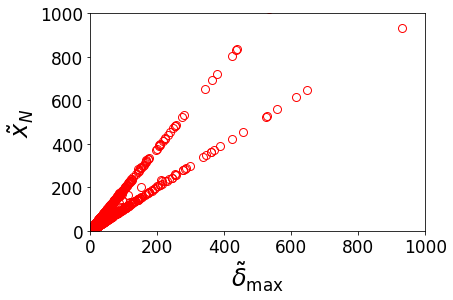

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(tilde_delta_max,tilde_x_N,'ro',fillstyle='none',ms=size_of_marker,mew=width_of_marker)

plt.xlim(0,1000)
plt.ylim(0,1000)
plt.xticks(fontsize=size_of_ticks)
plt.yticks(fontsize=size_of_ticks)
plt.xlabel(r'$\tilde{\delta}_\mathrm{max}$',fontsize=size_of_font)
plt.ylabel(r'$\tilde{x}_N$',fontsize=size_of_font)

